In [32]:
import pandas as pd
import numpy as пр
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('ILPD.csv',names=['Age','Gender','TB','DB','Alkphos','Spgt','Sogt','TP','ALG','A/G','Class'])
data.head()

,Age,Gender,TB,DB,Alkphos,Spgt,Sogt,TP,ALG,A/G,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [33]:
data.isna().sum()

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Spgt       0
Sogt       0
TP         0
ALG        0
A/G        4
Class      0
dtype: int64

<AxesSubplot:>

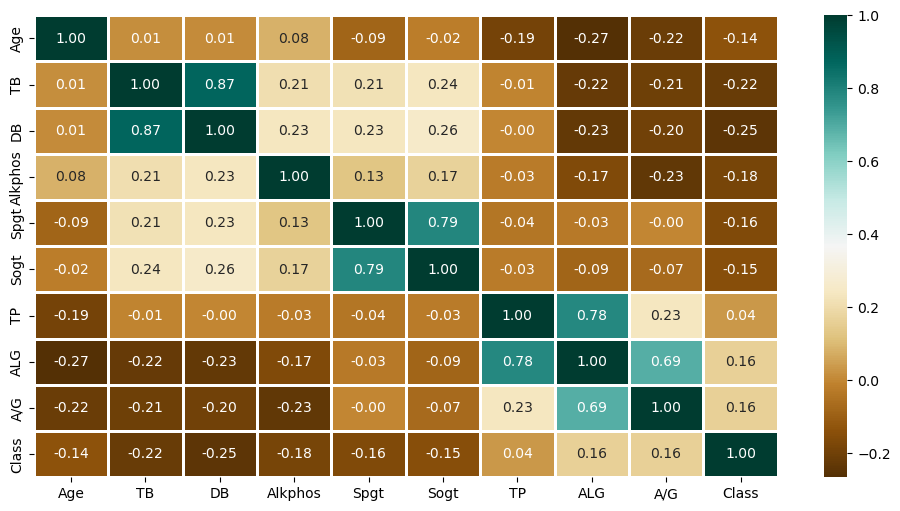

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

In [35]:
nan_rows = data[data['A/G'].isnull()]
print(nan_rows)


     Age  Gender   TB   DB  Alkphos  Spgt  Sogt   TP  ALG  A/G  Class
209   45  Female  0.9  0.3      189    23    33  6.6  3.9  NaN      1
241   51    Male  0.8  0.2      230    24    46  6.5  3.1  NaN      1
253   35  Female  0.6  0.2      180    12    15  5.2  2.7  NaN      2
312   27    Male  1.3  0.6      106    25    54  8.5  4.8  NaN      2


In [30]:
data['Class'].value_counts()

1    416
2    167
Name: Class, dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isna().any()

Age        False
Gender     False
TB         False
DB         False
Alkphos    False
Spgt       False
Sogt       False
TP         False
ALG        False
A/G        False
Class      False
dtype: bool

In [8]:
data.shape

(579, 11)

In [9]:
X=data.iloc[:,0:10]
X.head()


,Age,Gender,TB,DB,Alkphos,Spgt,Sogt,TP,ALG,A/G
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [10]:
y=data.iloc[:,-1]
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [11]:
X.Gender = X.Gender.map( {'Male':0 , 'Female':1} ) 


In [12]:
X.head()

,Age,Gender,TB,DB,Alkphos,Spgt,Sogt,TP,ALG,A/G
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [13]:
from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)



C:\Users\tatav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test)
from sklearn. metrics import accuracy_score
print("Accuracy :", accuracy_score(y_pred, y_test))


Accuracy : 0.6896551724137931


In [16]:
from sklearn. tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
print('Accuracy:', accuracy_score(clf.predict(X_test), y_test))


Accuracy: 0.5724137931034483


In [17]:
from sklearn. linear_model import Perceptron
clf2 = Perceptron()
clf2.fit(X_train, y_train)
print('Accuracy :', accuracy_score(clf2.predict(X_test), y_test))


Accuracy : 0.7172413793103448


In [18]:
data.Gender = data. Gender.map( {'Male':0, 'Female':1} )
df_majority = data[data.Class==1]
df_minority = data[data.Class==2]

In [19]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=414,
                                 random_state=123)


In [20]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Class.value_counts()


1    414
2    414
Name: Class, dtype: int64

In [21]:
X=df_upsampled.iloc[:,0:10]

y=df_upsampled.iloc[:,-1]
X.shape


(828, 10)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_pred, y_test))


Accuracy : 0.7246376811594203


C:\Users\tatav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion= 'gini')
clf.fit(X_train, y_train)
print('Accuracy : ', accuracy_score(clf.predict(X_test), y_test))


Accuracy :  0.8599033816425121


In [24]:
from sklearn.linear_model import Perceptron
clf2 = Perceptron()
clf2.fit(X_train, y_train)
print('Accuracy :', accuracy_score(clf2.predict(X_test), y_test))


Accuracy : 0.5265700483091788
